<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230329_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0315/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0315/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f789861f3d0>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
total = pd.concat([train, test], axis=0, ignore_index=True)
total = total.drop(["PassengerId", "Survived"], axis=1)
total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
def cabin(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
total["Cabin"] = total["Cabin"].apply(cabin)
total["Cabin"]

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin, Length: 1309, dtype: object

In [6]:
c = total["Ticket"].value_counts()
def ticket(t):
  if pd.isna(t):
    return t
  else:
    return c[t]
total["Ticket"] = total["Ticket"].apply(ticket)
total["Ticket"]

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket, Length: 1309, dtype: int64

In [7]:
total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,1,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,1,8.0500,NaN,S


In [8]:
import re
def name(n):
  if pd.isna(n):
    return n
  else:
    # 方法1：正規表示法
    pat = r".+,(.+?)\..+"
    mid = re.match(pat, n).group(1)
    return mid.strip()
    # 方法2：分解字元
    # return n.split(",")[0].split(".")[-1]
total["Name"] = total["Name"].apply(name)

In [9]:
total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [10]:
s = total.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [11]:
med = total.median().drop("Pclass")
total = total.fillna(med)

<ipython-input-11-dc1a23f12b47>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = total.median().drop("Pclass")


In [12]:
s = total.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin       1014
Embarked       2
dtype: int64

In [13]:
most = total["Embarked"].value_counts().idxmax()
total["Embarked"] = total["Embarked"].fillna(most)

In [14]:
s = total.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [15]:
c = total["Name"].value_counts()
reserved = c[c >10].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None

total["Name"] = total["Name"].apply(name2)

In [16]:
total = pd.get_dummies(total)
total = pd.get_dummies(total, columns=["Pclass"])
total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
total["Family"] = total["SibSp"] + total["Parch"]
total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
total_scale

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
total_scale.loc[0:2]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.0,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.0,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
total_scale.iloc[0:2]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.0,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1


In [21]:
import numpy as np
x = np.array(total_scale.iloc[:len(train)])
y = np.array(train["Survived"])
x_predict = np.array(total_scale.iloc[len(train):])
print(x.shape)
print(y.shape)
print(x_predict.shape)

(891, 26)
(891,)
(418, 26)


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
maxk, maxs = None, -1
for k in range(3,20):
  clf = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
  avg = score.mean()
  print(k, avg)
  if avg > maxs:
    maxk, maxs = k, avg
print("!!!", maxk, maxs)

3 0.8204993757802747
4 0.8081148564294631
5 0.8170786516853932
6 0.8227091136079899
7 0.832796504369538
8 0.8136828963795256
9 0.8125842696629213
10 0.8058676654182271
11 0.818214731585518
12 0.8069787765293384
13 0.8137203495630463
14 0.8125842696629213
15 0.8227215980024967
16 0.8137203495630463
17 0.8193508114856429
18 0.8137203495630461
19 0.8137203495630463
!!! 7 0.832796504369538


In [23]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x,y)
pre = clf.predict(x_predict)
pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pre}).to_csv("knn.csv", index=False, encoding="utf-8-sig")

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {"n_estimators":range(21, 101, 2), "max_depth":range(6, 15)}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 15),
                         'n_estimators': range(21, 101, 2)})

In [29]:
print(search.best_params_)
print(search.best_score_)

{'max_depth': 8, 'n_estimators': 39}
0.8473907615480648


In [30]:
clf = RandomForestClassifier(max_depth=7, n_estimators=83)
clf.fit(x,y)
pre = clf.predict(x_predict)
pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pre}).to_csv("rf.csv", index=False, encoding="utf-8-sig")

In [33]:
clf.estimators_

[DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=587530405),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=452266945),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=786782347),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=526825952),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=494673521),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=294885908),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=76577999),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=97075451),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                        random_state=1218539444),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=311307230),
 DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                        random_state=1790338005),
 DecisionTreeClassifier(max_depth=7, ma

In [34]:
clf.estimators_[54]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1968158190)

[Text(0.5, 0.875, 'x[10] <= 0.5\ngini = 0.476\nsamples = 577\nvalue = [544, 347]'),
 Text(0.25, 0.625, 'x[24] <= 0.5\ngini = 0.365\nsamples = 204\nvalue = [79, 250]'),
 Text(0.125, 0.375, 'x[13] <= 0.5\ngini = 0.087\nsamples = 112\nvalue = [8, 168]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[19] <= 0.5\ngini = 0.497\nsamples = 92\nvalue = [71, 82]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[20] <= 0.5\ngini = 0.286\nsamples = 373\nvalue = [465, 97]'),
 Text(0.625, 0.375, 'x[21] <= 0.5\ngini = 0.3\nsamples = 347\nvalue = [426, 96]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[5] <= 0.5\ngini = 0.049\nsamples = 26\nvalue = [39, 1]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

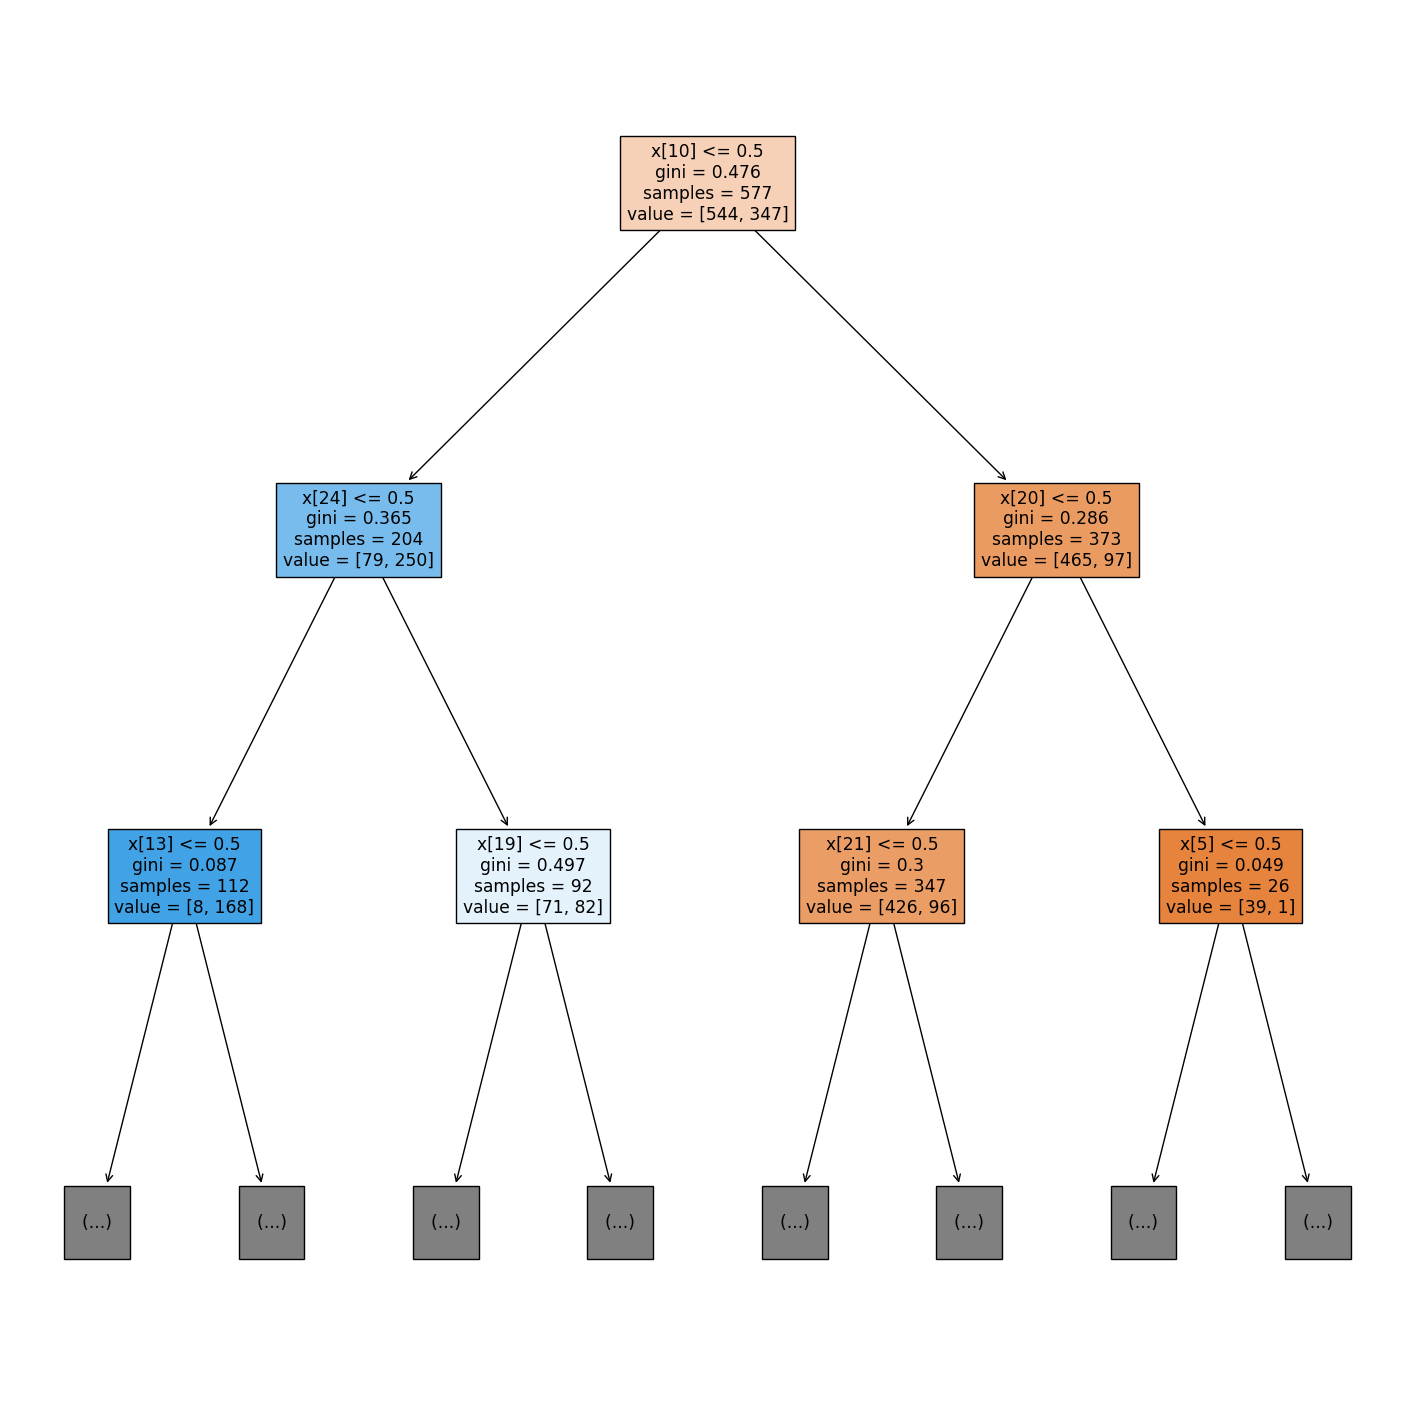

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
plot_tree(clf.estimators_[54], 
     max_depth=2,  
     filled=True
     ) 

In [35]:
s = pd.Series(clf.feature_importances_, index=total.columns)
s.sort_values(ascending=False)

Sex_male       0.159935
Sex_female     0.136157
Name_Mr        0.135819
Fare           0.100651
Age            0.078122
Pclass_3       0.067656
Ticket         0.055860
Family         0.041976
SibSp          0.029597
Name_Miss      0.028464
Pclass_1       0.028102
Name_Mrs       0.025316
Parch          0.018459
Pclass_2       0.017999
Name_Master    0.015520
Cabin_E        0.012264
Embarked_S     0.011643
Embarked_C     0.010767
Cabin_D        0.006855
Cabin_B        0.006179
Cabin_C        0.005095
Embarked_Q     0.003714
Cabin_G        0.001985
Cabin_A        0.001059
Cabin_F        0.000669
Cabin_T        0.000136
dtype: float64

<Axes: xlabel='count', ylabel='Sex'>

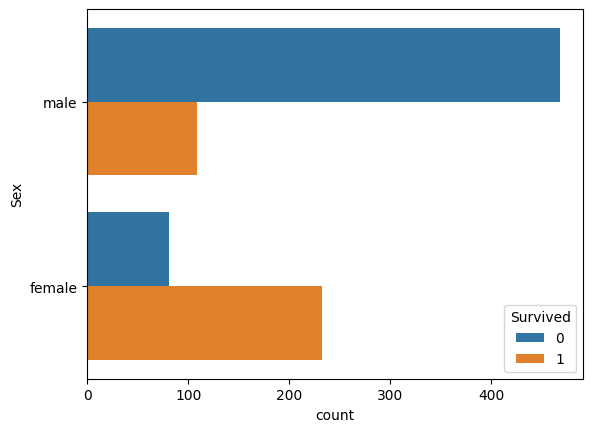

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=train, y="Sex", hue="Survived")

<Axes: xlabel='Fare', ylabel='Count'>

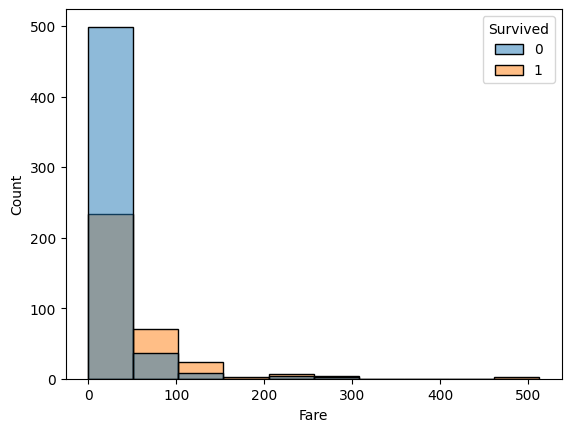

In [37]:
sns.histplot(data=train, x="Fare", hue="Survived", bins=10)

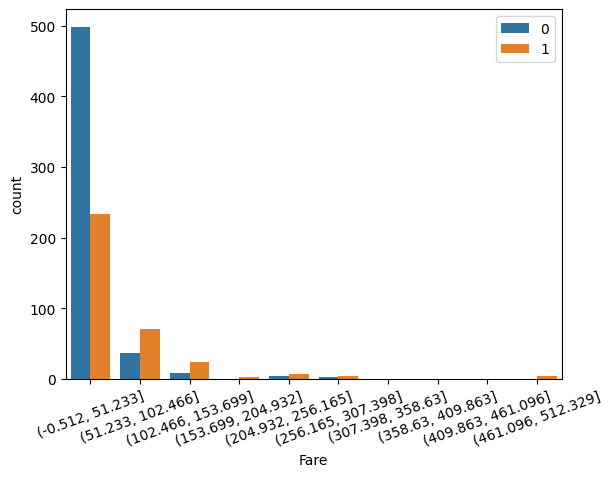

In [40]:
c = pd.cut(train["Fare"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

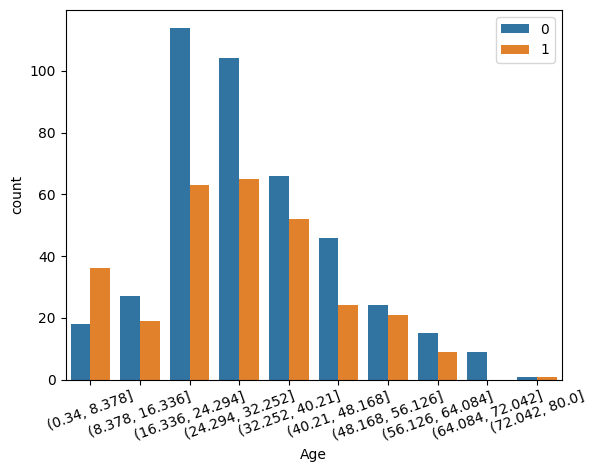

In [41]:
c = pd.cut(train["Age"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

scaler = MinMaxScaler()
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
total_scale
x_scale = np.array(total_scale.iloc[:len(train)])
y = np.array(train["Survived"])
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)
x_tsne

array([[-16.280052  ,  -8.849023  ],
       [ 27.791925  ,  -0.46107763],
       [ 13.903162  , -22.771381  ],
       ...,
       [ 13.649121  , -26.783869  ],
       [  4.948589  ,  26.934042  ],
       [-36.990868  ,   6.7697062 ]], dtype=float32)

<Axes: >

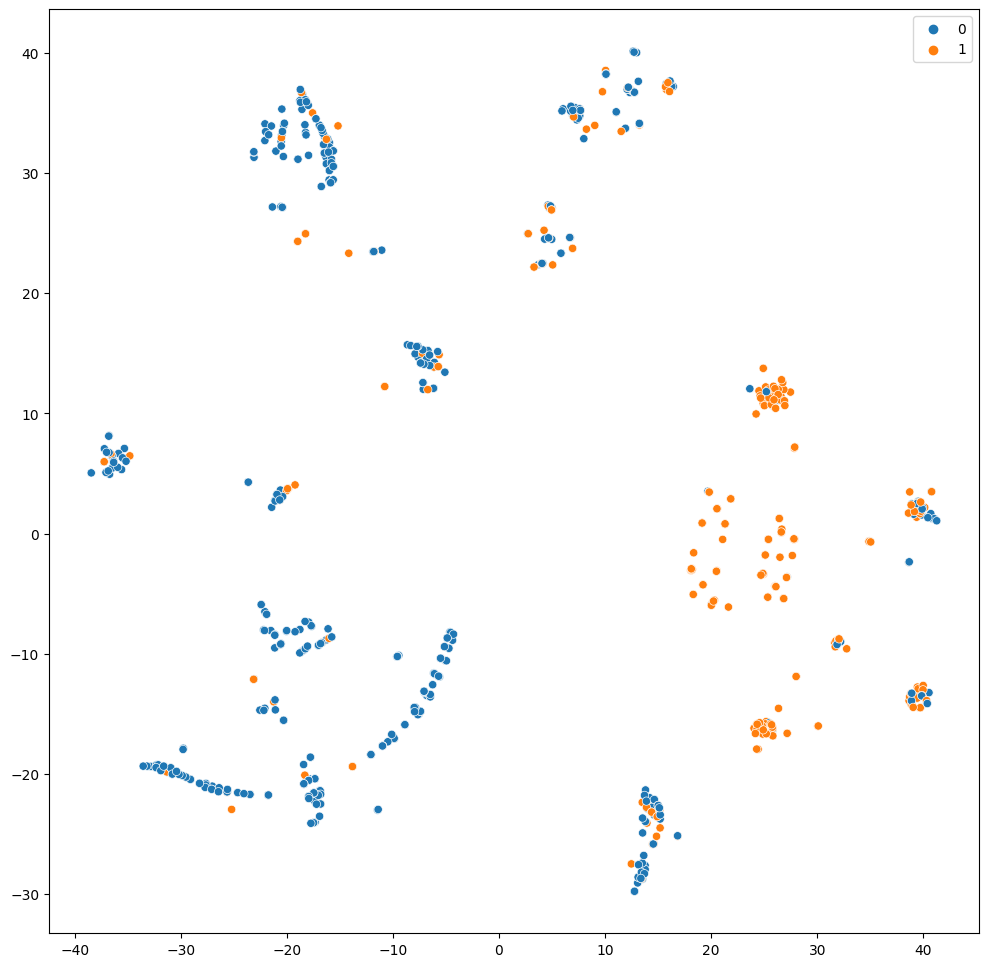

In [45]:
plt.figure(figsize=(12, 12))
x_coord = x_tsne[:, 0]
y_coord = x_tsne[:, 1]
sns.scatterplot(x=x_coord, y=y_coord, hue=y)